# Árboles de Decisión

Los árboles de decisión son un tipo de algoritmo de Machine Learning que se utilizan para tomar decisiones basadas en una serie de preguntas y respuestas. Imagina que estás jugando un juego de "20 preguntas" en el que tienes que adivinar un objeto. Comienzas haciendo preguntas generales, como "¿Es un animal?" y luego haces preguntas más específicas dependiendo de la respuesta, como "¿Tiene cuatro patas?" o "¿Puede volar?". Al final, llegas a una conclusión basada en las respuestas obtenidas.

Este proceso de hacer preguntas y tomar decisiones en cada paso es muy similar a cómo funcionan los árboles de decisión. Los árboles de decisión son visualmente como un diagrama de flujo donde cada "nodo" representa una pregunta (o condición), y las "ramas" representan las posibles respuestas o decisiones que puedes tomar en función de esa pregunta.

## ¿Por qué son interesantes?

1. **Facilidad de interpretación:** Los árboles de decisión son fáciles de entender y explicar. Cada decisión tomada en el árbol es claramente visible, lo que hace que el modelo sea transparente.
2. **Visualización clara:** Puedes ver y entender cómo el modelo llega a una conclusión al seguir las ramas del árbol, lo que es muy útil para explicar el razonamiento detrás de una predicción.
3. **Flexibilidad:** Los árboles de decisión pueden ser usados para problemas tanto de clasificación como de regresión, lo que los hace muy versátiles.

A continuación, exploraremos más a fondo cómo funcionan matemáticamente y cómo podemos utilizarlos en un ejemplo de la vida real.


# Matemáticas Detrás de los Árboles de Decisión

Para entender cómo los árboles de decisión toman decisiones, necesitamos hablar de dos conceptos importantes: **entropía** y **ganancia de información**.

## Entropía

La **entropía** es una medida de la incertidumbre o impureza en un conjunto de datos. En otras palabras, nos dice qué tan mezclados están los datos en términos de sus etiquetas. La fórmula matemática para la entropía es:

$$
H(S) = - \sum_{i=1}^c p_i \log_2(p_i)
$$

Donde:
- \(S\) es el conjunto de datos.
- \(p_i\) es la proporción de elementos en la clase \(i\).

Si todos los elementos en \(S\) pertenecen a la misma clase, la entropía es 0 (no hay incertidumbre). Si las clases están perfectamente balanceadas, la entropía es 1 (máxima incertidumbre).

## Ganancia de Información

La **ganancia de información** es la reducción en la entropía que resulta al dividir un conjunto de datos en subconjuntos basados en una característica particular. La ganancia de información se calcula como:

$$
IG(S, A) = H(S) - \sum_{v \in \text{Valores}(A)} \frac{|S_v|}{|S|} H(S_v)
$$

Donde:
- \(A\) es el atributo que estamos utilizando para dividir el conjunto.
- \(S_v\) es el subconjunto de \(S\) donde el atributo \(A\) toma el valor \(v\).

La característica con la mayor ganancia de información se selecciona para dividir el nodo en el árbol de decisión.


# Ejemplo de la Vida Real: Decisión de Adopción de Mascotas

Imagina que estás trabajando en un refugio de animales y quieres predecir si una persona adoptará un perro basado en algunas preguntas simples. Tienes los siguientes datos:

- ¿La persona tiene un jardín?
- ¿La persona tiene hijos?
- ¿La persona es alérgica a los animales?

Estos factores se pueden utilizar para construir un árbol de decisión que prediga si la persona adoptará un perro o no.

Vamos a construir un árbol de decisión simple basado en este ejemplo.


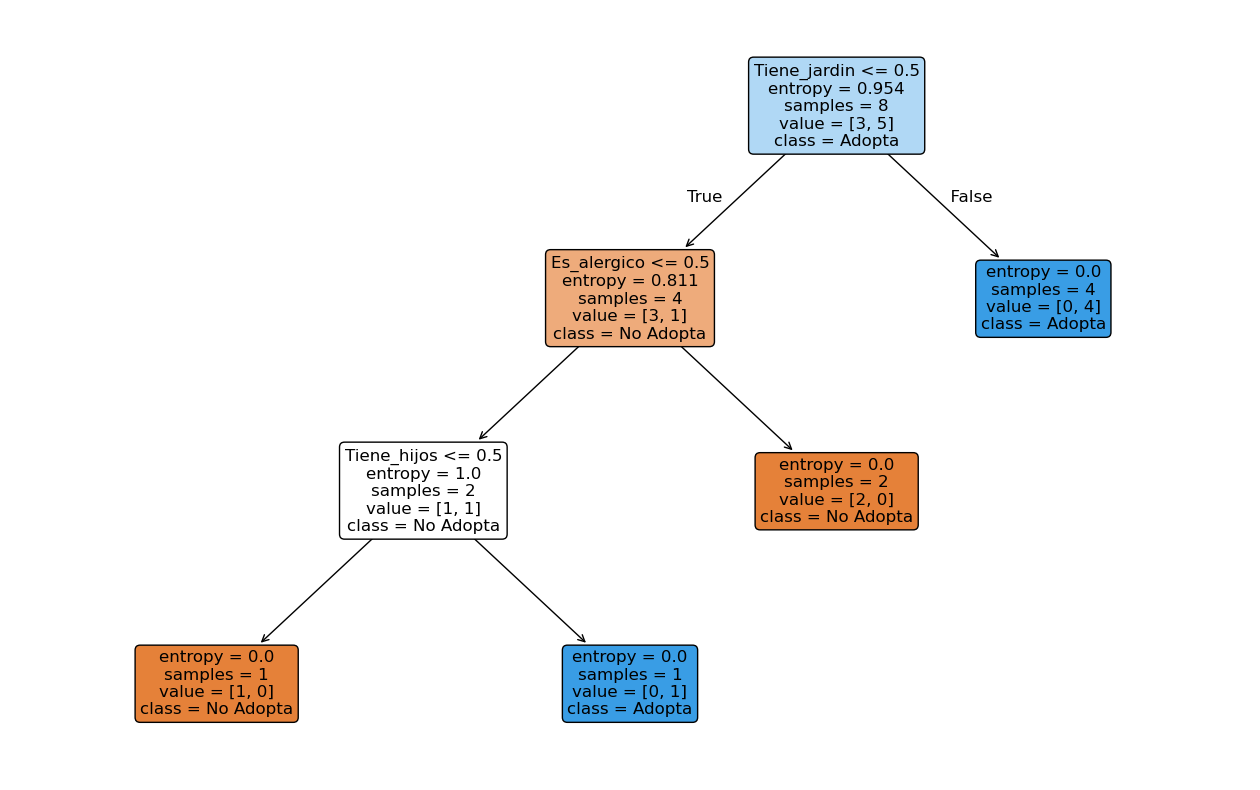

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Crear el conjunto de datos
data = {
    'Tiene_jardin': [1, 1, 0, 0, 1, 0, 0, 1],
    'Tiene_hijos': [0, 1, 1, 0, 0, 1, 0, 1],
    'Es_alergico': [0, 0, 0, 1, 1, 1, 0, 0],
    'Adopta_perro': [1, 1, 1, 0, 1, 0, 0, 1]
}

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Separar las características (X) y la etiqueta (y)
X = df[['Tiene_jardin', 'Tiene_hijos', 'Es_alergico']]
y = df['Adopta_perro']

# Crear y entrenar el modelo de árbol de decisión
modelo = DecisionTreeClassifier(criterion='entropy', random_state=0)
modelo.fit(X, y)

# Visualizar el árbol de decisión con ajustes en el tamaño del gráfico y disposición
plt.figure(figsize=(16,10))  # Aumentar el tamaño del gráfico
plot_tree(modelo, feature_names=X.columns, class_names=['No Adopta', 'Adopta'], filled=True, rounded=True, fontsize=12)
plt.show()


# Interpretación del Árbol de Decisión para la Adopción de Mascotas

El árbol de decisión que hemos generado nos ayuda a entender cómo ciertas características influyen en la probabilidad de que una persona adopte un perro. A continuación, explicamos el contenido de los nodos, las decisiones que se toman en cada nivel del árbol, y los conceptos de entropía y `value`.

## Nodo Raíz

El nodo raíz del árbol realiza la primera división basada en la pregunta **"¿Tiene jardín?"**. Esta es la característica que más reduce la **entropía** en nuestro conjunto de datos, lo que significa que proporciona la mayor ganancia de información al separar los datos.

### Entropía en el Nodo Raíz

- **Entropía**: La entropía mide la incertidumbre o impureza en los datos. En este nodo, la entropía está calculada en función de cuántas personas en el conjunto de datos adoptan o no adoptan un perro. Una entropía de 0 indica que todos los datos pertenecen a una sola clase (no hay incertidumbre), mientras que una entropía de 1 indica máxima incertidumbre.
  
  En el nodo raíz, la entropía no es 0, lo que significa que los datos están mezclados (algunas personas adoptan y otras no).

### Valor (`value`)

- **Valor**: El `value` mostrado en el nodo representa la distribución de las clases en ese punto del árbol. Por ejemplo, `value = [3, 5]` indica que, en este nodo, hay 3 personas que no adoptan un perro y 5 personas que sí lo adoptan. Este valor ayuda a entender la proporción de las clases antes de que se realice una división.

- **Decisión en el Nodo Raíz**:
  - Si la respuesta es **Sí (1)** a "¿Tiene jardín?", seguimos por la rama izquierda.
  - Si la respuesta es **No (0)**, seguimos por la rama derecha.

## Rama Izquierda: **Tiene Jardín = Sí**

- **Entropía**: La entropía aquí es baja porque la mayoría de las personas con jardín adoptan un perro. Esto significa que hay poca incertidumbre en este nodo.
- **Clase mayoritaria**: Adopta (1)
- **Proporción y Valor**: `value = [1, 3]` indica que entre las personas que tienen jardín, 1 no adopta un perro y 3 sí lo hacen.

Este nodo sugiere que si una persona tiene un jardín, es muy probable que adopte un perro, ya que la mayoría de las personas con jardín en nuestros datos adoptan.

## Rama Derecha: **Tiene Jardín = No**

En este caso, el árbol examina la siguiente característica, **"¿Tiene hijos?"**, para hacer una predicción más precisa.

### Subrama Izquierda: **Tiene Hijos = Sí**

- **Entropía**: La entropía en este nodo sigue siendo baja porque la mayoría de las personas sin jardín pero con hijos adoptan un perro. Esto refleja que hay poca incertidumbre en esta decisión.
- **Clase mayoritaria**: Adopta (1)
- **Proporción y Valor**: `value = [1, 2]` indica que en este nodo, 1 persona no adopta un perro y 2 personas sí lo hacen.

Este nodo indica que aunque la persona no tenga jardín, si tiene hijos, hay una alta probabilidad de que adopte un perro.

### Subrama Derecha: **Tiene Hijos = No**

- **Entropía**: La entropía es 0 aquí, lo que indica que todas las personas en este nodo pertenecen a una sola clase. Esto significa que no hay incertidumbre.
- **Clase mayoritaria**: No Adopta (0)
- **Proporción y Valor**: `value = [3, 0]` muestra que las 3 personas en este grupo no adoptan un perro.

Este nodo indica que si una persona no tiene jardín ni hijos, es muy probable que no adopte un perro.

## Conclusión

El árbol de decisión revela que la característica más determinante para predecir si una persona adoptará un perro es si tiene un jardín. Si la persona no tiene jardín, el siguiente factor más importante es si tiene hijos. La entropía en cada nodo nos muestra cuán ciertas son las decisiones en ese punto: una entropía más baja indica una mayor certeza. El `value` en cada nodo nos proporciona una visión clara de la distribución de los datos en cada rama del árbol.

Este modelo es fácil de interpretar y proporciona una representación visual clara del proceso de toma de decisiones basado en los datos que tenemos.
